# Masking

## setting

In [1]:
import dlib
import cv2 as cv
import cv2
import numpy as np
import matplotlib.patches as patches
import urllib.request as urlreq
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib.patches as patches

## GPU setting

In [2]:
import torch
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

In [3]:
print (f"PyTorch version:{torch.__version__}") # 1.12.1 이상
print(f"MPS 장치를 지원하도록 build 되었는지: {torch.backends.mps.is_built()}") # True 여야 합니다.
print(f"MPS 장치가 사용 가능한지: {torch.backends.mps.is_available()}") # True 여야 합니다.

!python -c 'import platform;print(platform.platform())'

PyTorch version:2.2.1
MPS 장치를 지원하도록 build 되었는지: True
MPS 장치가 사용 가능한지: True
macOS-14.1.2-arm64-arm-64bit


In [4]:
face_det = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("/Users/kimsoojin/Desktop/AI시스템/팀플/CODE/shape_predictor_68_face_landmarks.dat")

## modeling code
---

`path` : low resolution image set 

`masked_path` : masked low resolution image set

### path

In [2]:
file_list=[]

path="/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/mask_low_resol_image/testresult_B_2/"

masked_path="/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/mask_low_resol_image/testresult_B_2/"

un_recognizable_face_list=[]

files = os.listdir(path)

for file in files:
  file_list.append(file)

print(f'file_list({len(file_list)})')
path+file_list[1]

file_list(7897)


['.DS_Store',
 'masked_processed_20221113_ID1146_B_03_N00014.png',
 'masked_processed_20221111_ID1173_B_01_N00166.png',
 'masked_processed_20221119_ID2045_B_01_N00179.png',
 'masked_processed_20221201_ID2483_B_01_N00205.png',
 'masked_processed_20221121_ID1598_B_03_N00196.png',
 'masked_processed_20221112_ID1690_B_01_N00057.png',
 'masked_processed_20221130_ID2300_B_04_N00256.png',
 'masked_processed_20221103_ID0399_B_03_N00046.png',
 'masked_processed_20221116_ID1626_B_01_N00147.png',
 'masked_processed_20221201_ID2647_B_01_N00202.png',
 'masked_processed_20221026_ID0341_B_01_N00120.png',
 'masked_processed_20221113_ID1161_B_02_N00160.png',
 'masked_processed_20221201_ID2436_B_01_N00008.png',
 'masked_processed_20221201_ID2459_B_01_N00270.png',
 'masked_processed_20221129_ID2326_B_01_N00027.png',
 'masked_processed_20221119_ID2073_B_03_N00170.png',
 'masked_processed_20221101_ID0381_B_03_N00083.png',
 'masked_processed_20221102_ID0388_B_01_N00044.png',
 'masked_processed_20221130_ID21

### def

In [5]:
def Masking_function(upper_path,file_name,masked_path):

  image = cv2.imread(upper_path+file_name)

  image = cv2.resize(image, (400, 400))
  image_copy=image

  #cv2_imshow(image)

  image_copy=image
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

  # 얼굴검출
  faces = face_det(image_gray)

  if len(faces) != 0:

    #print(f'faces={faces},{len(faces)}')

    for face in faces:
        # 랜드마크 검출
        lm = landmark_model(image_rgb, face)

        lm_point = []

        for p in lm.parts():
            lm_point.append([p.x, p.y])
        lm_point = np.array(lm_point)


    image_rgb_copy=image_rgb.copy()

    landmark_list=lm_point

    plt.imshow(image_rgb_copy)

    num=1
    for i in range(14):
        triangle = patches.Polygon([(landmark_list[29][0], landmark_list[29][1]),
                                    (landmark_list[num][0], landmark_list[num][1]),
                                    (landmark_list[num+1][0], landmark_list[num+1][1])], closed=True, edgecolor='black', facecolor='black')
        plt.gca().add_patch(triangle)
        num = num + 1
    plt.axis("off")
    plt.savefig(masked_path+'masked_'+file_name,bbox_inches='tight', pad_inches=0)
    print(f"\n[{file_name}] saved!--------------it's {file_list.index(file_name)}\n")

    plt.show()

  else:
    print('\nFace landmarks are not recognizable\n')
    un_recognizable_face_list.append(file_list.index(file_name))
    print(f'{file_list.index(file_name)} is appended to un_recognizable_face_list\n')




### main

In [24]:
masked_file_list=[]

files = os.listdir(masked_path)

for file in files:
  masked_file_list.append(file)

print(f'masked_file_list : {len(masked_file_list)} of files')

masked_file_list : 3925 of files


365

In [10]:
count=0
for file_name in file_list[1:10]:
  landmark_list=[]
  image_path=path+file_name
  print(f'[{count}th Image]'+'-'*75)
  Masking_function(path,file_name,masked_path) #(upper_path,file_name,masked_path)
  print('-'*60)
  print(f'un_recognizable_face_list={un_recognizable_face_list}\n')
  count += 1

print('*'*90)
print('*'*40,'D O N E','*'*41)
print('*'*90)

[0th Image]---------------------------------------------------------------------------

Face landmarks are not recognizable

1 is appended to un_recognizable_face_list

------------------------------------------------------------
un_recognizable_face_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 1]

[1th Image]---------------------------------------------------------------------------

Face landmarks are not recognizable

2 is appended to un_recognizable_face_list

------------------------------------------------------------
un_recognizable_face_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2]

[2th Image]---------------------------------------------------------------------------

Face landmarks are not recognizable

3 is appended to un_recognizable_face_list

------------------------------------------------------------
un_recognizable_face_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3]

[3th Image]---------------------------------------------------------------------------

Face landmarks are not recognizable

4 

## number of masked image data

In [18]:
masked_file_list=[]

files = os.listdir(masked_path)

for file in files:
  masked_file_list.append(file)

print(f'masked_file_list({len(masked_file_list)})\n={masked_file_list}')

masked_file_list(439)
=['masked_processed_processed_20221216_ID3586_B_04_N00195.png', 'masked_processed_processed_20221216_ID3645_B_04_N00147.png', 'masked_processed_processed_20221216_ID3670_B_01_N00018.png', '.DS_Store', 'masked_processed_20221114_ID1745_B_03_N00174.png', 'masked_processed_20221116_ID1843_B_01_N00194.png', 'masked_processed_20221117_ID1907_B_04_N00176.png', 'masked_processed_20221102_ID0386_B_04_N00210.png', 'masked_processed_20221116_ID1628_B_03_N00176.png', 'masked_processed_20221113_ID1798_B_02_N00220.png', 'masked_processed_20221115_ID1807_B_03_N00015.png', 'masked_processed_20221109_ID0239_B_02_N00051.png', 'masked_processed_20221101_ID0383_B_03_N00040.png', 'masked_processed_20221124_ID1870_B_03_N00156.png', 'masked_processed_20221125_ID2249_B_02_N00213.png', 'masked_processed_20221115_ID1653_B_01_N00148.png', 'masked_processed_20221123_ID2188_B_02_N00130.png', 'masked_processed_20221129_ID2375_B_01_N00024.png', 'masked_processed_20221101_ID0377_B_02_N00122.png

# Organize Files 

In [ ]:
import os

# 폴더 경로 설정
folder_4 = '/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/4.mask_high_resol_set'
folder_3 = '/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/3.masked_low_resol_set'
folder_2 = '/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/2. low_resol_set [A~C]'
folder_1 = '/Users/kimsoojin/Desktop/AI시스템/팀플/DATA/1. original_set [None]'

# 폴더 내 파일명 추출 및 리스트 저장 함수
def get_filenames(folder_path):
    return [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# 1. 4번 폴더 내 모든 파일명 추출 → 4_list에 저장
list_4 = get_filenames(folder_4)
list_3 = [filename.replace('high_', '') for filename in list_4]
list_2 = [filename.replace('masked_', '') for filename in list_3]
list_1 = [filename.replace('processed_', '') for filename in list_2]

# 결과 출력
print("4_list:",f'{len(list_4)}\n{list_4}')
print("3_list:",f'{len(list_3)}\n{list_3}')
print("2_list:",f'{len(list_2)}\n{list_2}')
print("1_list:",f'{len(list_1)}\n{list_1}')



Number of faces detected: 0


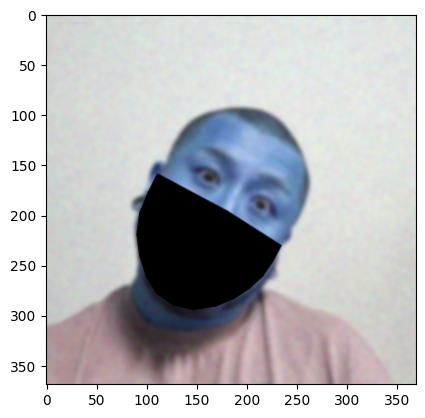

In [16]:
import numpy as np
import dlib
import cv2

RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(27, 36))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(1, 17))
ALL = list(range(0, 68))
EYES = list(range(36, 48))


#-- 데이터 파일과 이미지 파일 경로
predictor_file ="/Users/kimsoojin/Desktop/AI시스템/팀플/CODE/shape_predictor_68_face_landmarks.dat"
image_file = path+file_list[1]

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_file)

image = cv2.imread(image_file)
plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)
print("Number of faces detected: {}".format(len(rects)))


for (i, rect) in enumerate(rects):
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[ALL]
    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)




# Mask Landmark

In [ ]:
image_path=path+file_name

In [10]:
file_list=[]

img_path="/Users/kimsoojin/Desktop/AI시스템/팀플/sample data/"

saving_path="/Users/kimsoojin/Desktop/AI시스템/팀플/sample_saving_path/"

files = os.listdir(img_path)

for file in files:
  file_list.append(file)

print(f'file_list({len(file_list)})')

file_list(2)


In [14]:
image_path=img_path+file_list[0]
print(image_path)

/Users/kimsoojin/Desktop/AI시스템/팀플/sample data/KakaoTalk_Photo_2024-06-06-10-36-35.png


In [12]:
def Masking_function(image_path, saving_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_det(image_gray)
    
    triangle_coords = []

    if len(faces) != 0:
        for face in faces:
            # 랜드마크 검출
            lm = landmark_model(image_rgb, face)
            lm_point = np.array([[p.x, p.y] for p in lm.parts()])

        image_rgb_copy = image_rgb.copy()
        landmark_list = lm_point

        plt.imshow(image_rgb_copy)

        num = 1
        for i in range(14):
            triangle = patches.Polygon(
                [(landmark_list[29][0], landmark_list[29][1]),
                 (landmark_list[num][0], landmark_list[num][1]),
                 (landmark_list[num+1][0], landmark_list[num+1][1])], 
                closed=True, edgecolor='black', facecolor='black'
            )
            plt.gca().add_patch(triangle)
            triangle_coords.append([(landmark_list[29][0], landmark_list[29][1]),
                                    (landmark_list[num][0], landmark_list[num][1]),
                                    (landmark_list[num+1][0], landmark_list[num+1][1])])
            num = num + 1

        plt.axis("off")
        
        plt.show()

        return triangle_coords
    else:
        print('\nFace landmarks are not recognizable\n')
        return None



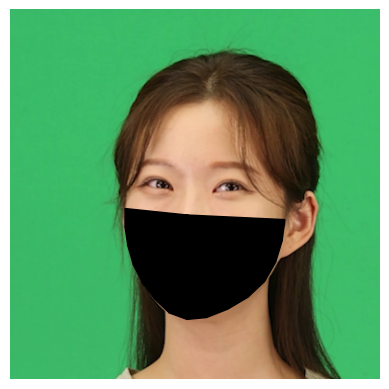

[[(191, 222), (124, 215), (124, 235)], [(191, 222), (124, 235), (127, 255)], [(191, 222), (127, 255), (133, 276)], [(191, 222), (133, 276), (143, 295)], [(191, 222), (143, 295), (156, 313)], [(191, 222), (156, 313), (172, 328)], [(191, 222), (172, 328), (191, 335)], [(191, 222), (191, 335), (212, 333)], [(191, 222), (212, 333), (235, 324)], [(191, 222), (235, 324), (257, 311)], [(191, 222), (257, 311), (275, 294)], [(191, 222), (275, 294), (287, 273)], [(191, 222), (287, 273), (294, 250)], [(191, 222), (294, 250), (297, 227)]]


In [13]:
# 함수 실행
triangle_coordinates = Masking_function(image_path, saving_path)
print(triangle_coordinates)